In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import fdsreader

# # Set the matplotlib output to svg
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg')

import matplotlib.pyplot as plt
# params = {'mathtext.default': 'regular' }
# params = {'text.usetex': True, 'font.family': 'sans-serif', 'figure.dpi': 400}
# params = {'text.usetex': True, 'figure.dpi': 400}
# plt.rcParams.update(params)

import matplotlib as mpl
mpl.rcParams['svg.hashsalt'] = 'seed'
svg_metadata={'Date':None}

# plt.rcParams['text.latex.preamble'] = [
#        r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
#        r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
#        r'\usepackage{helvet}',    # set the normal font here
#        r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
#        r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
# ]

import numpy as np
import seaborn as sns

sns.set()
#sns.set(style="whitegrid")
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.5})

import os
# check for set environment variable JB_NOSHOW
show = True
if 'JB_NOSHOW' in os.environ:
    show = False

import fdsreader

# Example – Pool Fire

## Introduction

Pool fires are interesting for studying fire development, because they are relatively easy to handle. One needs a fireproof pan, for example made out of steel sheets, and fill in a combustible liquid. Shortly after ignition, it reaches a quasi steady-state, due to the evaporation of the liquid. One of the shortcomings of pool fires is their limited fuel supply. This is one of the reasons why gas burners are often used in fire experiments. That, and the good reproducibility associated with gas burners as ignition source. Also in FDS, most pool fire simulations are modelled as gas burners ([see Section "11.4 Simple Pyrolysis Models" in the FDS User's Guide](https://github.com/firemodels/fds/releases/tag/FDS6.7.5)).

This example illustrates the setup and analysis of a minimalist FDS simulation. Starting from a simple pool fire with a fixed heat release rate, the model is extended by various parameters. The results are then validated by comparison with simple analytical methods.


## Simulation of a Purely Buoyant Diffusion Flame

In this section, we discuss the simulation of buoyant diffusion flames. Focus is on the campaign of gas burner experiments conducted by McCaffrey in 1979 {cite}`McCaffrey.1979`. The experimental setup is described in the report: [Purely Buoyant Diffusion Flames: Some Experimental Results](https://nvlpubs.nist.gov/nistpubs/Legacy/IR/nbsir79-1910.pdf). Purely bouyant diffusion flames can be defined as those which take place over combustible gases leaving the surface of a solid or liquid fuel with negligible velocity. In such cases, the fire is said to be dominated by buoyancy. This is a common characteristic of fires that develop freely over a pool of liquid fuel, or over a solid polymeric material. 

The main purpose of the experiments described in the report is to measure the temperature and the velocity magnitude in the near field of the flame, with probes and thermocouples. Flames of five different heat release rates of $\small\sf 14.4~kW$, $\small\sf 21.7~kW$, $\small\sf 33.3~kW$, $\small\sf 44.9~kW$, $\small\sf 57.5~kW$ are considered, and the measurements are taken at the central line of the flame. A burner of natural gas injects fuel at a controlled rate, so as to obtain the desired heat release. For a complete description of the experiment, please visit the reference in the previous paragraph.

Please consult the [Basic Examples]("../../examples/01_basic/01_basic_example_i.ipynb") and the FDS User Guide when you get stuck.

### Task I -- Building the setup

The simulation setup is built, based on the dimensions presented in the report referenced above. A methane burner with a heat release rate of $\small\sf 33.0~kW$ can be considered as a start. The burner dimensions are $\small\sf 0.30 \times 0.30~m$ and its surface is positioned at $\small\sf 0.72~m$ above the floor. The lateral and top boundaries of the simulation domain are open. The extension of the domain is

$$\small\sf [-0.75~m, 0.75~m] \times [-0.75~m, 0.75~m] \times [-0.72~m, 3.24~m]$$ 

with a grid resolution of $\small\sf 0.06~m$. 


Necessary steps:
- Create a folder to collect the simulation results
- Define a `MESH`
- Apply mesh boundaries
- Create a base for the burner
- Set a heat release
- Define an appropriate combustion reaction
- Check if the heat release is correct

```{tip} When adding new diagnostics or other elements, it is useful to reduce the simulation time (T_END) to allow for a fast turn-over-time. This way debugging or adjusting your setup will be more efficient. For pure geometrical checks, the simulation time can also be set to zero.  
```


:::{figure-md} 

<img src="figs/extra_task_diffusion_flame_01.png" width="55%">

Visualization of the simulation setup in Smokeview.
:::

In total, five different simulations need to be run, one for each heat release rate indicated above.


### Task II -- Confirm that the Simulation is Set Up Correctly

During the simulation, the recorded data can be collected from the output files created. This information can already investigated while the simulation is running. The `CHID_hrr.csv` contains information about the heat and mass releases.
Create a plot, to assess that the heat release rate (HRR) is set up correctly. The plot should contain a horizontal line indicating the target that is to be reached and the HRR data from the simulation.


### Task III -- Assess the Effect of Closed Off Boundaries

Change the `MESH` boundaries to be closed. Plot the HRR, what do you observe?

Continue the next task with open boundaries again.


### Task IV -- Record Data on Slices Through the Domain

FDS can record many quantities on planes slicing through the domain (`SLCF`). Set up the data recording in an x-z plane, located at y = 0m.

Record the following quantities in your simulation:
- Gas temperature
- Gas temperature, cell centered
- Gas velocity
- Gas velocity with vectors
- Heat release per unit volume

```{tip} Check the FDS User Guide for the SLCF quantities. 
```


### Task V -- Assess the Temperatures on the Plume Axis

A set of measuring devices (`DEVC`) of temperature and velocity are positioned along the central line of the flame.
Start positioning devices at z = - 0.1 (x = 0, y = 0). Position them with a vertical distance of 2 cm apart.



```{tip} Check the FDS User Guide for the quantities TEMPERATURE and THERMOCOUPLE. Check also for how devices can be positioned along a line.  
```

Plot the recorded temperature data from the devices. 
- What can you observe?
- When does the simulation setup reach a steady-state?
- How do you determine the stedy-state?

The data recorded from the devices is stored in the `CHID_devc.csv` output files. 


### Task VI -- Compare Plume Temperatures of the Simulation and Analytical Methods

In this task, plume temperatures are to be computed with analytical methods. This allows to validate the results of a numerical simulation. Analytical models from McCaffrey and Heskestad are used in this comparison, together with your simulation results. 

For more detailed information on the theory and application of the plume formulas, please refer to the literature, e.g. Enclosure Fire Dynamics by B. Karlsson and J. Quintiere {cite}`Karlsson.1999`.


***McCaffrey***

$\small\sf \Delta T $ indicates the temperature rise in the plume centerline axis above ambient temperature:

$$\small\sf
\Delta T = \left(\frac{\kappa}{0.9 \cdot \sqrt{2g}}\right)^2 \cdot \left(\frac{z}{\dot{Q}^{2/5}}\right)^{2\eta-1} \cdot T_\infty
$$

where $\small\sf \dot{Q}$ is the total heat release rate, $\small\sf T_\infty = 293~K$ is the ambient temperature, $\small\sf g = 9.81~ms^{-1}$ is the gravitational constant, z is the height above the fuel source in m. The constants $\small\sf \eta$ and $\small\sf \kappa$ vary depending on the plume regions and can be obtained from the following table.

| Region       | $ \small\sf \frac{z}{\dot{Q}^{2/5}}$    | $\small\sf \eta$ | $\small\sf \kappa$           |
|--------------|---------------------|--------|-----------------------------|
| Continuous   | < 0.08           | 1/2  | $\small\sf 6.8~[m^{1/2}/s]$           |
| Intermittent | 0.08-0.2         |  0    | $\small\sf 1.9~[m/(kW^{1/5}s)]$       |
| Plume        | > 0.2            | -1/3 | $\small\sf 1.1~[m^{4/4}/(kW^{1/3}s)]$ |


***Heskestad***

$\small\sf \Delta T $ indicates the temperature rise in the plume centerline axis above ambient temperature:


$$ \small\sf
\Delta T = 9.1 \left(\frac{T_\infty}{g \cdot c_p^2 \cdot \rho_\infty^2} \right)^{1/3} \cdot \dot{Q}_c^{2/3} \cdot (z -z_0)^{-5/3}
$$

where $\sf \dot{Q}_c$ is the convective heat release rate, $\small\sf T_\infty = 293~K$ is the ambient temperature, $\small\sf g = 9.81~ms^{-1}$ is the gravitational constant, $\small\sf \rho_\infty = 1.2 kg/m^3$ is the 
density of air at ambient temperature, $\small\sf c_p = 1.0~kJ/(kg K)$ is the specific heat capacity and z is the height above the fuel source in m.

The virtual origin $\small\sf z_0$ depends on the (equivalent) diameter D of the fire source and the total heat release rate and is given by:

$$\small\sf
z_0 = 0.083 \cdot \dot{Q}^{2/5} - 1.02 \cdot D
$$

The calculation of the plume temperature according to Heskestad is defined exclusively for the area above the flame. The flame height is calculated by the following expression: 

$$\small\sf
L = 0.235 \cdot \dot{Q}^{2/5} - 1.02 \cdot D
$$


**Task:**

1. Calculate the temperatures of the plume within the respective application limits using the analytical approaches of the Heskestad and McCaffrey Plumes with an HRR of $\small\sf 33.0~kW$ at heights of about $\small\sf  z = 0.15~m, 0.5~m, 0.9~m, 1.2~m, 1.5~m, 2.2~m$. Assume that the radiative fraction of the plume is $\small\sf 20.0~\%$ and $ \small\sf A_{fire}=1~m^2$ . Compare the results and discuss the reasons for the deviations.

2. Compare the results from the analytical calculations to the results of an FDS simulation using temperature devices. Smooth the output by a moving average to reduce noise. Refer to section 20.1 of the [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) for further information on how to place Devices in the computational domain.

    Add the following lines to your FDS file to open the lateral and top boundaries of the sealed domain which provides a better depiction of the boundary conditions of the empirically determined plume formulas:
    ```
    &VENT MB = 'XMIN' SURF_ID = 'OPEN' /
    &VENT MB = 'XMAX' SURF_ID = 'OPEN' /
    &VENT MB = 'YMIN' SURF_ID = 'OPEN' /
    &VENT MB = 'YMAX' SURF_ID = 'OPEN' /
    &VENT MB = 'ZMAX' SURF_ID = 'OPEN' /
    ``` 
    
```{tip} To reduce noise, temperatures calculated with FDS can be smoothed using a simple moving average (SMA). The SMA of a time series $\small\sf x(t)$ is the sequence of arithmetic averages of $\small\sf  n$ consecutive data points.
$\small\sf m_{SMA}(t) = \frac{1}{n}\sum_{i=0}^{n-1}x(t-i)$
```


Example of a plot comparing plume temperatures at different heights.


In [9]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


def sma (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
d_t_hesk_dict = {3.0:379, 4.0:229, 5.0:156, 6:114}
d_t_mcf_dict = {1.0:852, 2.0:527, 3.0:352, 4.0:221, 5.0:152, 6.0:112}
color_list = ['b', 'c', 'g', 'r', 'y', 'm']
data_root = root + 'data/pool_fire/1mw_open'
sim = fdsreader.Simulation(data_root)
height_list = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
window = 100
for z, c in zip(height_list, color_list):
    time = sim.devices['Time'].data
    temperature = sim.devices[f'T_{z}'].data
#     plt.scatter(time, temperature, s=1, alpha=0.1, color=c)
    plt.plot(sma(time, window), sma(temperature, window), label=f"z = {z}", color=c)
    if z in d_t_hesk_dict:
        plt.axhline(y=d_t_hesk_dict[z]+20, color=c, linestyle='dashed')
    if z in d_t_mcf_dict:
        plt.axhline(y=d_t_mcf_dict[z]+20, color=c, linestyle='dotted')
    plt.annotate(f"$\sf z={z}~m$", xy=(30, d_t_mcf_dict[z]-50),  color=c, annotation_clip=False)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.xlabel("Time / s")
plt.ylabel("Temperature / $\sf ^\circ C$")
line_fds = Line2D([0], [0], color='black', linestyle='-')
line_hesk = Line2D([0], [0], color='black', linestyle='dashed')
line_mcf = Line2D([0], [0], color='black', linestyle='dotted')
plt.legend([line_fds, line_hesk, line_mcf], ["FDS", "Heskestad", "MCCaffrey"])

plt.savefig('figs/pool_fire_1mw_open_temperatures_devc.svg', bbox_inches='tight')
plt.close()

**2. Solution**
:::{figure-md} fig-pool-fire-hrr

<img src="figs/pool_fire_1mw_open_temperatures_devc.svg" width="80%">

Moving average of `TEMPERATURE` devices at heights 1.0, 2.0, 3.0, 4.0, 5.0 and 6.0 m smoothed over 100 datapoints.
:::

## Time-dependent Heat Release Rate

This task deals with the different possibilities to define the heat release rate (HRR) of a design fire and to model it in FDS. The total heat release  $\small\sf \dot{Q}$ of a burning area $\small\sf A_{fire}$ depends on the heat release rate per unit area $\small\sf \dot{q}''$:

$$\small\sf \dot{Q} = {A_{Fire} \cdot \dot{q}''}$$
In FDS a burning area is defined by a `VENT` with a certain surface property that can be assigned by a `SURF_ID`. A fixed heat release rate per unit area can be set to a `SURF` by the attribute `HRRPUA`. Please refer to section 10.2.1 "Basics" of the [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) for further information.

```{tip} Create an automation in Python or Excel that outputs the strings of the RAMP lines for the FDS input file.  
```

**Task:**

1. Model the HRR progression for a radially spreading fire with a maximum power of 1 MW in FDS assuming a fixed burning area (task 1.1) and a radial propagation from the center of the burning area (task 1.2).


    1. The HRR according to the 't-square' model can be described by:
    
        $$\small\sf \dot Q = \alpha \cdot t^2$$
        where t is the  burning time after ignition and $\small\sf \alpha$ is the fire growth factor.Assume a fast fire propagation by $\small\sf \alpha = 0.04689~kW/s^2$ and a **constant** heat release rate per unit area of $\small\sf  \dot{q}'' = 0.25~MW/m^2$. The maximum burning area is $\small\sf  A_{fire} = 1~m^2$. First calculate the time until the fire has spread to the entire area. This corresponds to the time at which the maximum HRR is reached. For simplicity, assume a perfect radial fire spread and a round fire area. Then model the temporal evolution of the HRR in FDS via a `RAMP` function (See section 20.6 "Controlling a Ramp" of the [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) ).
    
    2. Model the fire propagation directly in FDS by defining the spread rate. The `SPREAD` attribute denotes a constant radial propagation speed from a specified point.
        :::{figure-md} fig-pool-fire-spread

        <img src="figs/pool_fire_spread.svg" width="30%">

        Fire propagation via FDS `SPREAD` attribute
        :::
    
        For instructions on how to model a radial fire spread in FDS, please refer to the [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) Section 11.4.2 "Special Topic: A Radially-Spreading Fire". The radial propagation speed v can be obtained from the fire area $\small\sf A_{Fire}$ and the corresponding burning period t.
        
        $$\small\sf v = \frac{\sqrt{A_{fire}/\pi}}{t}$$

    3. Compare the HRR curves calculated by FDS with each other and discuss the limitations and inaccuracies associated with each approach.


2. Given is the fictional mass loss of a heptane fire. Calculate the heat release of the fire over the entire burning period with an assumed effective heat of combustion $\small\sf  \Delta h_{c,eff} = 44,590~kJ / kg$. Model the HRR in FDS by using the RAMP function. Check if the simulated curve matches the prescribed HRR. The effective heat of combustion indicates the heat release per unit of weight of a material burned in combustion. For simplicity, assume that the averaged mass loss between two time steps applies to the end of each time interval. 
The mass loss caused by the burn-up can be described by the following time-dependent correlation:
    ```
    time_index = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275 ] # [s]
    total_mass = [4000, 4000, 3600, 3040, 2880, 2400, 1800, 1120, 600, 160, 0, 0] # [g]
     ```

**1. Solution**
```{toggle}
The burning period for the fire to reach the maximum heat release is:

$$
t = \frac{\dot{q}'' \cdot A_{Fire}}{\alpha} = \frac{250 \cdot 1}{0.04689} \approx 73~s
$$

By setting the time and fraction parameters `T` and `F`, the `RAMP` function is obtained as follows:

    &SURF ID = 'BURNER', HRRPUA = 250, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /
    &VENT XB = -0.5,0.5, -0.5,0.5, 0.0, 0.0, SURF_ID='BURNER' /
    &RAMP ID='fireramp', T=0, F=0.00
    .
    .
    .
    &RAMP ID='fireramp', T=73, F=1.00

The spread rate corresponds to the propagation speed in m/s:

$$
\small\sf v = \frac{\sqrt{A_{fire}/\pi}}{t} = \frac{\sqrt{1/\pi}}{73} = 0.00773 m/s
$$

Starting from the center of the vent, the radial propagation of the fire in FDS can be described as follows:

    &SURF ID = 'BURNER', HRRPUA = 250, COLOR = 'RASPBERRY' /
    &VENT XB = -0.5,0.5, -0.5,0.5, 0.0, 0.0, SURF_ID='BURNER', SPREAD_RATE = 0.00773 /
```

In [10]:
alpha = 0.04689
Qdot_max = 250
t = (Qdot_max / alpha)**(1/2)
print(t)
print(f"&SURF ID = 'BURNER', HRRPUA = {Qdot_max}, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /")
for t in range(0, 74):
    Qdot = alpha * t **2
    
    print(f"&RAMP ID='fireramp', T={t}, F={Qdot / Qdot_max:.2f}")

73.01799238972059
&SURF ID = 'BURNER', HRRPUA = 250, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /
&RAMP ID='fireramp', T=0, F=0.00
&RAMP ID='fireramp', T=1, F=0.00
&RAMP ID='fireramp', T=2, F=0.00
&RAMP ID='fireramp', T=3, F=0.00
&RAMP ID='fireramp', T=4, F=0.00
&RAMP ID='fireramp', T=5, F=0.00
&RAMP ID='fireramp', T=6, F=0.01
&RAMP ID='fireramp', T=7, F=0.01
&RAMP ID='fireramp', T=8, F=0.01
&RAMP ID='fireramp', T=9, F=0.02
&RAMP ID='fireramp', T=10, F=0.02
&RAMP ID='fireramp', T=11, F=0.02
&RAMP ID='fireramp', T=12, F=0.03
&RAMP ID='fireramp', T=13, F=0.03
&RAMP ID='fireramp', T=14, F=0.04
&RAMP ID='fireramp', T=15, F=0.04
&RAMP ID='fireramp', T=16, F=0.05
&RAMP ID='fireramp', T=17, F=0.05
&RAMP ID='fireramp', T=18, F=0.06
&RAMP ID='fireramp', T=19, F=0.07
&RAMP ID='fireramp', T=20, F=0.08
&RAMP ID='fireramp', T=21, F=0.08
&RAMP ID='fireramp', T=22, F=0.09
&RAMP ID='fireramp', T=23, F=0.10
&RAMP ID='fireramp', T=24, F=0.11
&RAMP ID='fireramp', T=25, F=0.12
&RAMP ID='fireramp', T=26, F=0

In [11]:
data_root = root + 'data/pool_fire/ramp_spread/rundir'
sim = fdsreader.Simulation(data_root)
plt.plot(sim.hrr["Time"], sim.hrr["HRR"], label='FDS SPREAD')
t_min_max = [sim.hrr["Time"][0], sim.hrr["Time"][-1]]

data_root = root + 'data/pool_fire/ramp_tsquare'
sim = fdsreader.Simulation(data_root)
plt.plot(sim.hrr["Time"], sim.hrr["HRR"], label='FDS RAMP')
t_min_max = [sim.hrr["Time"][0], sim.hrr["Time"][-1]]

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.xlabel("Time / s")
plt.ylabel("HRR / kW")
plt.savefig('figs/pool_fire_10mw_sealed_hrr_spread.svg', bbox_inches='tight')
plt.close()

:::{figure-md} fig-pool-fire-hrr-spread

<img src="figs/pool_fire_10mw_sealed_hrr_spread.svg" width="80%">

Simulated `HRR` generated by `RAMP` and `SPREAD` as a function of time.
:::

**2. Solution**
```{toggle}
The HRR can be obtained from the mass loss $\small\sf \dot{m_{fuel}}$ by the following expression:
$$\small\sf \dot{Q} = \Delta h_{c,eff} \dot{m_{fuel}}$$

The maximum 

    &SURF ID = 'BURNER', HRRPUA = 1212.85, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /
    &RAMP ID='fireramp', T=0, F=0.00 /
    &RAMP ID='fireramp', T=25, F=0.15 /
    &RAMP ID='fireramp', T=50, F=0.59 /
    &RAMP ID='fireramp', T=75, F=0.68 /
    &RAMP ID='fireramp', T=100, F=0.35 /
    &RAMP ID='fireramp', T=125, F=0.59 /
    &RAMP ID='fireramp', T=150, F=0.88 /
    &RAMP ID='fireramp', T=175, F=1.00 /
    &RAMP ID='fireramp', T=200, F=0.76 /
    &RAMP ID='fireramp', T=225, F=0.65 /
    &RAMP ID='fireramp', T=250, F=0.24 /
    &RAMP ID='fireramp', T=275, F=0.00 /


```

In [12]:
time_list = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275 ]
mass_list = [4000, 3900, 3500, 3040, 2800, 2400, 1800, 1120, 600, 160, 0, 0]
mlr_list = np.diff(mass_list)/np.diff(time_list) # mass loss rate

huc = 44590 # Effective heat of combustion huc = 44590 KJ / kg
hrr_list =abs(mlr_list/1000*huc) # calculate HRR from mass loss
hrr_list = np.concatenate(([0], hrr_list)) # add 0 mass at first timestep
print(hrr_list)
print(f"&SURF ID = 'BURNER', HRRPUA = {max(hrr_list):.2f}, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /")
for time, hrr in zip(time_list, hrr_list):
    print(f"&RAMP ID='fireramp', T={time}, F={hrr/max(hrr_list):.2f} /")

[   0.     178.36   713.44   820.456  428.064  713.44  1070.16  1212.848
  927.472  784.784  285.376    0.   ]
&SURF ID = 'BURNER', HRRPUA = 1212.85, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /
&RAMP ID='fireramp', T=0, F=0.00 /
&RAMP ID='fireramp', T=25, F=0.15 /
&RAMP ID='fireramp', T=50, F=0.59 /
&RAMP ID='fireramp', T=75, F=0.68 /
&RAMP ID='fireramp', T=100, F=0.35 /
&RAMP ID='fireramp', T=125, F=0.59 /
&RAMP ID='fireramp', T=150, F=0.88 /
&RAMP ID='fireramp', T=175, F=1.00 /
&RAMP ID='fireramp', T=200, F=0.76 /
&RAMP ID='fireramp', T=225, F=0.65 /
&RAMP ID='fireramp', T=250, F=0.24 /
&RAMP ID='fireramp', T=275, F=0.00 /


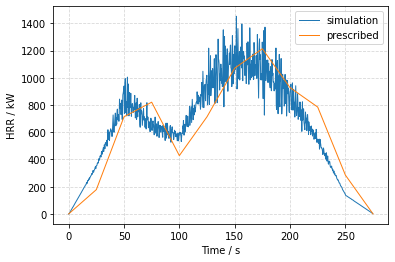

In [13]:
# Plot HRR from Simulation
data_root = root + 'data/pool_fire/ramp_heptane/rundir'
sim = fdsreader.Simulation(data_root)
plt.plot(sim.hrr["Time"], sim.hrr["HRR"], label='simulation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Time / s")
plt.ylabel("HRR / kW")
# Plot prescribed data
plt.plot(time_list, hrr_list, label = 'prescribed')
plt.legend(loc='best')
plt.savefig('figs/pool_fire_hrr_heptane_ramp.svg', bbox_inches='tight')
# plt.close()

:::{figure-md} fig-pool-fire-hrr-ramp

<img src="figs/pool_fire_hrr_heptane_ramp.svg" width="80%">

Prescribed and simulated `HRR` of n-heptane fire as a function of time. The heat release can be derived from the mass loss and the effective heat of combustion $\small\sf \Delta h_{c,eff}$.
:::

## Grid Convergence / HPC computing / Benchmarking

This task deals with the monitoring of simulation parameters such as computation time and the convergence of numerical solutions. 

**Task:**

1. Increase / decrease the grid resolution by factors of 0.4 and 2. Monitor the computing time by evaluating the .out file.

2. Extend the examination by refining the grid by a factor of 4 and 8, using resources of parallel computing. For this purpose subdivide the computational domain into several meshes.

3. Analyze the computation time for assigning multiple cores to a single OpenMP process. Split the computational domain into different meshes and assign individual MPI processes to each of them. Try to combine MPI and OpenMP and evaluate the increase in performance.

4. Check grid convergence for the respective resolutions of the domain based on temperature and velocity criteria

**Solution:**

In [ ]:
import pandas as pd
data_root = root + 'data/pool_fire/gc_3_1/rundir'
caselist = ['gc_1_1', 'gc_1_2', 'gc_1_3', 'gc_2_1', 'gc_2_2', 'gc_2_3', 'gc_3_1', 'gc_3_2', 'gc_3_3' ]
bm_dict = {}
for case in caselist:
    case_dict = {}
    data_root = root + f'data/pool_fire/{case}/rundir'
    sim = fdsreader.Simulation(data_root)
    case_dict['devc_temp'] = sim.devices[f'T_{1.0}'].data
    case_dict['sim_time'] = sim.devices['Time'].data
    case_dict['total_time'] = sim.cpu['Total T_USED (s)\n'][0]
    out_file = sim.out_file_path
    with open(out_file, 'r') as file:
        for line in file:
            if 'Total Number of Grid Cells' in line:
                case_dict['n_cells'] = int(line.split('Cells')[-1])
            if 'Number of OpenMP Threads:' in line:
                case_dict['n_open_mp'] = int(line.split('Number of OpenMP Threads:')[-1])
            if 'Number of MPI Processes:' in line:
                case_dict['n_mpi']= int(line.split('Number of MPI Processes:')[-1])
    
    bm_dict[case] = case_dict
bm_df = pd.DataFrame(bm_dict).T

for n_open_mp in [1,2,4]:
    df = bm_df[bm_df['n_open_mp']==n_open_mp]
    plt.plot(df['n_cells'], df['total_time'], label=f"$\sf N_{{openMP}}$ = {n_open_mp}")
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("$\sf N_{{cells}}$ / -")
plt.ylabel("Time / s")
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.savefig('figs/pool_fire_benchmarking.svg', bbox_inches='tight')

In [ ]:
window = 10
for n_cells in [2000, 31250, 250000]:
    time = bm_df[bm_df['n_cells']==n_cells].iloc[0]['sim_time']
    temp = bm_df[bm_df['n_cells']==n_cells].iloc[0]['devc_temp']
    plt.plot(sma(time, window), sma(temp, window), label=f"$\sf N_{{cells}}$ = {n_cells}")
    plt.grid(True, which="both", linestyle='--', alpha=0.5)
    plt.legend(loc='lower right')
plt.xlabel("Time / s")
plt.ylabel("Temperature / $\sf ^\circ C$")
plt.savefig('figs/pool_fire_grid_convergence.svg', bbox_inches='tight')
plt.close()

:::{figure-md} fig-pool-fire-benchmarking

<img src="figs/pool_fire_benchmarking.svg" width="80%">

Total computation time as a function of the total number of grid cells in the computational domain ( $\sf N_{cells}$ ) for different amount of openMP processes ($\sf N_{openMP}$). 
:::
 

:::{figure-md} fig-pool-fire-grid-convergence

<img src="figs/pool_fire_grid_convergence.svg" width="80%">

Checking grid convergence for a device with quantity `TEMPERATURE` at XYZ (0, 0, 1). A grid size of 20 cm and below, which results in a total number of 31250 cells, does not show any significant change in temperature.
:::